In [1]:
#Dependencies
!pip install gmplot
!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from gmplot import gmplot
import gmaps
import matplotlib.lines as mlines
# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
crime_csv_path = 'dc-crimes-search-results.csv'
# Import the data into a Pandas DataFrame
crime_df = pd.read_csv(crime_csv_path)
#crime_df.head()

crime_df["YEAR"] = crime_df["END_DATE"].str[0:4]
no_null_crime_df = crime_df.dropna(how='any')
no_null_crime_df=no_null_crime_df.rename(index=str , columns={"NEIGHBORHOOD_CLUSTER":"NEIGHBORHOOD"})
# replace the clusters with actual names continued
no_null_crime_df['NEIGHBORHOOD']= no_null_crime_df['NEIGHBORHOOD'].replace(
    {'cluster 15':'Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace',
     'cluster 2':'Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View',
     'cluster 3':'Howard University, Le Droit Park, Cardozo/Shaw',
     'cluster 4':'Georgetown, Burleith/Hillandale',
     'cluster 5':'West End, Foggy Bottom, GWU',
     'cluster 6':'Dupont Circle, Connecticut Avenue/K Street',
     'cluster 1':'Kalorama Heights, Adams Morgan, Lanier Heights',
     'cluster 7':'Shaw, Logan Circle',
     'cluster 8': 'Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street',
     'cluster 9': 'Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point',
     'cluster 10': 'Hawthorne, Barnaby Woods, Chevy Chase',
     'cluster 11':'Friendship Heights, American University Park, Tenleytown',
     'cluster 12':'North Cleveland Park, Forest Hills, Van Ness',
     'cluster 13':'Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir',
     'cluster 14':'Cathedral Heights, McLean Gardens, Glover Park',
     'cluster 16': 'Colonial Village, Shepherd Park, North Portal Estates',
     'cluster 17': 'Takoma, Brightwood, Manor Park',
     'cluster 18': 'Brightwood Park, Crestwood, Petworth',
     'cluster 19':'Lamond Riggs, Queens Chapel, Fort Totten, Pleasant Hill',
     'cluster 20': 'North Michigan Park, Michigan Park, University Heights',
     'cluster 21': 'Edgewood, Bloomingdale, Truxton Circle, Eckington',
     'cluster 22':'Brookland, Brentwood, Langdon',
     'cluster 23':'Ivy City, Arboretum, Trinidad, Carver Langston',
     'cluster 24':'Woodridge, Fort Lincoln, Gateway',
     'cluster 25': 'NoMa, Union Station, Stanton Park, Kingman Park',
     'cluster 26':'Capitol Hill, Lincoln Park',
     'cluster 27':'Near Southeast, Navy Yard',
     'cluster 28': 'Historic Anacostia',
     'cluster 29': 'Eastland Gardens, Kenilworth',
     'cluster 30': 'Mayfair, Hillbrook, Mahaning Heights',
     'cluster 31': 'Deanwood, Burrville, Grant Park, Lincoln Heights, Fairmont Heights',
     'cluster 32': 'River Terrace, Benning, Greenway, Fort Dupont',
     'cluster 33': 'Capitol View, Marshall Heights, Benning Heights',
     'cluster 34': 'Twining, Fairlawn, Randle Highlands, Penn Branch, Fort Davis Park, Dupont Park',
     'cluster 35': 'Fairfax Village, Naylor Gardens, Hillcrest, Summit Park',
     'cluster 36': 'Woodland/Fort Stanton, Garfield Heights, Knox Hill',
     'cluster 37': 'Sheridan, Barry Farm, Buena Vista',
     'cluster 38': 'Douglass, Shipley Terrace',
     'cluster 39':'Congress Heights, Bellevue, Washington Highlands'})



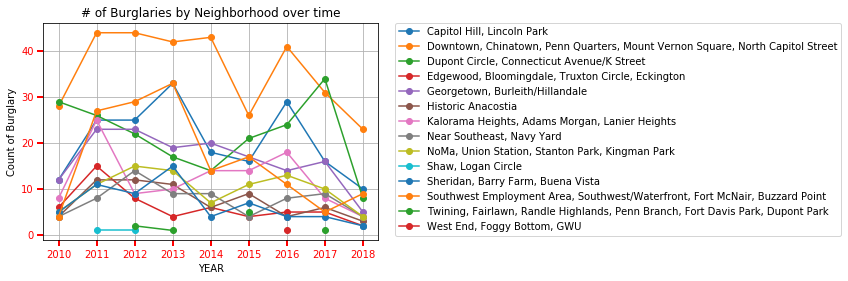

In [3]:
# Select a dataframe for burglary
crime_burglary_df = no_null_crime_df.loc[no_null_crime_df["OFFENSE"] == "burglary", :]
crime_burglary_df
#Using GroupBy in order to separate the data into fields according to "offense" and "neighborhood" values
grouped_crime_burglary_df = crime_burglary_df.groupby(['NEIGHBORHOOD','YEAR']).size().sort_values(ascending=False)
grouped_crime_burglary_df = grouped_crime_burglary_df.reset_index(name='Count')
grouped_crime_burglary_df.head(20)
grouped_crime_burglary_df["YEAR"] = pd.to_numeric(grouped_crime_burglary_df["YEAR"])
dataset = grouped_crime_burglary_df.pivot(index="YEAR",columns="NEIGHBORHOOD", values ="Count")

# Display a graph for burglary by neighborhood over time
dataset.plot(kind="line", marker="o", grid = True, title = "Number of Burglaries by Neighborhood over time")
grouped_crime_burglary_df.set_index("YEAR")
#Set the label for the y-axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize']=(10,50)
plt.ylabel("Count of Burglary")
plt.title("# of Burglaries by Neighborhood over time")
plt.xlabel("YEAR")
x_axis = grouped_crime_burglary_df["YEAR"].unique()
plt.tick_params(direction='out', length=6, width=2, colors='r')
# Show plot
plt.show()
plt.savefig("burglary.png")

In [4]:
#Display a heatmap of burglary
locations = crime_burglary_df[["LATITUDE","LONGITUDE"]]
fig=gmaps.figure(map_type='HYBRID')
fig.add_layer(gmaps.heatmap_layer(locations))
fig

Figure(layout=FigureLayout(height='420px'))

In [5]:
print(grouped_crime_burglary_df)

                                          NEIGHBORHOOD  YEAR  Count
0    Downtown, Chinatown, Penn Quarters, Mount Vern...  2011     44
1    Downtown, Chinatown, Penn Quarters, Mount Vern...  2012     44
2    Downtown, Chinatown, Penn Quarters, Mount Vern...  2014     43
3    Downtown, Chinatown, Penn Quarters, Mount Vern...  2013     42
4    Downtown, Chinatown, Penn Quarters, Mount Vern...  2016     41
5           Dupont Circle, Connecticut Avenue/K Street  2017     34
6                           Capitol Hill, Lincoln Park  2013     33
7    Southwest Employment Area, Southwest/Waterfron...  2013     33
8    Downtown, Chinatown, Penn Quarters, Mount Vern...  2017     31
9                           Capitol Hill, Lincoln Park  2016     29
10   Southwest Employment Area, Southwest/Waterfron...  2012     29
11          Dupont Circle, Connecticut Avenue/K Street  2010     29
12   Downtown, Chinatown, Penn Quarters, Mount Vern...  2010     28
13   Southwest Employment Area, Southwest/Waterf